- 소스 코드 설명:   
원래 데이터 세트는 피처 X와 target y가 잡음(noise)이 포함된 다항식의 코사인(Cosine) 그래프 관계를 가지도록 만들어줌.   
그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제   
   
   
- 학습 데이터는 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교해보자
- 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE값을 구해 차수별 예측 성능을 평가
- 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보자


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.41입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898890e+05 -1.87415330e+06  2.03715477e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08]입니다.
Degree 15 MSE는 180513241.14입니다.


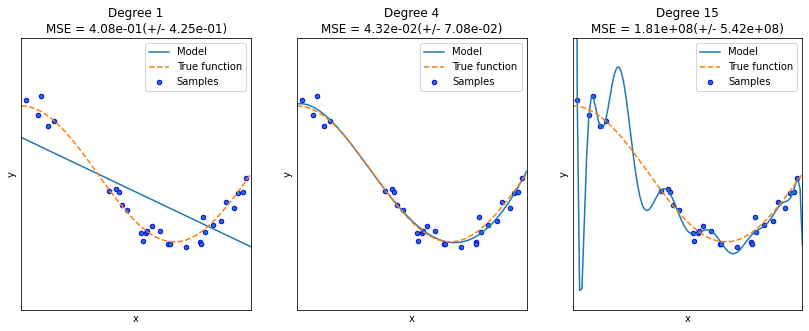

In [9]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=()) # plt.setp(): 선 두께, 색깔 등 좀 더 다양한 조정
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], np.round(-1*np.mean(scores),2)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

1. Degree 1 예측 곡선:
    - 단순한 직선으로서 단순 선형 회귀와 똑같음.
    - 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보임
    - 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 **과소 적합 모델**
    ⇒ MSE: 0.41   
    

2. Degree 4 예측 곡선:
    - 실제 데이터 세트와 유사한 모습
    - 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 데이터 기반으로 테스트 데이터를 **잘 예측한 곡선**을 가진 모델
    ⇒ MSE: 0.04로 가장 뛰어난 예측 성능   
    

3. Degree 15 예측 곡선:
    - MSE 값이 180513241.14가 될 정도로 어처구니없는 오류 값 발생(물론 과적합을 강조하기 위해 Degree를 매우 높은 차수인 15로 설정한 결과)
    - 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐
    - 결과적으로 학습 데이터에 너무 충실하게 맞춘 **과적합이 심한 모델**이 되었고, 어이없는 수준의 높은 MSE 값이 나옴   
    

**좋은 예측 모델**은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고 Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌, **학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델**